In [1]:
# Local Imports and Utils
from utils.graphs import make_gridgraph
from bmsspy.solvers import bmssp
from matplotlib import pyplot as plt


gridgraph = make_gridgraph(25, 25)

test_cases = [
    ('bottomLeft', {"x": 5, "y": 5}),
    ('topRight', {"x": gridgraph.x_size-5, "y": gridgraph.y_size-5}),
    ('center',{"x": int(gridgraph.x_size/2)-5, "y": int(gridgraph.y_size/2)}),
]


In [2]:
def make_heatmap(gridgraph, title, origin_dict: dict[str, int]):
    origin_idx = gridgraph.get_idx(**origin_dict)
    bmssp_output = bmssp(gridgraph.graph, origin_idx)
    distance_matrix = bmssp_output['distance_matrix']
    
    heatmap = [[0 for _ in range(gridgraph.y_size)] for _ in range(gridgraph.x_size)]
    for idx, val in enumerate(distance_matrix):
        x, y = gridgraph.get_x_y(idx)
        heatmap[y][x] = val

    plt.imshow(heatmap, cmap='cool', interpolation='nearest')
    # Invert y-axis to have origin at bottom-left
    plt.gca().invert_yaxis()
    # Add title and labels
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    # Add color bar
    plt.colorbar()
    plt.show()
    return heatmap

In [3]:
def make_sp_tree(gridgraph, title, origin_dict: dict[str, int]):
    origin_idx = gridgraph.get_idx(**origin_dict)
    bmssp_output = bmssp(gridgraph.graph, origin_idx)
    predecessor_matrix = bmssp_output['predecessor']
    
    fig, ax = plt.subplots()
    
    # Step 1: Create arrows from each node to its predecessor
    for idx, pred in enumerate(predecessor_matrix):
        if pred == -1:
            continue  # Skip the origin or unreachable nodes
        x1, y1 = gridgraph.get_x_y(pred)  # From (predecessor)
        x2, y2 = gridgraph.get_x_y(idx)   # To (current node)
        
        dx = x2 - x1
        dy = y2 - y1
        
        # Draw arrow
        ax.arrow(
            x1, y1, dx, dy,
            head_width=0.2, head_length=0.2,
            fc='blue', ec='blue', length_includes_head=True
        )
    
    # Step 2: Plot nodes (optional, helps visualize grid)
    for x in range(gridgraph.x_size):
        for y in range(gridgraph.y_size):
            ax.plot(x, y, 'ko', markersize=2)  # small black dot for each node
    
    # Step 3: Highlight origin
    ox, oy = gridgraph.get_x_y(origin_idx)
    ax.plot(ox, oy, 'ro', markersize=6, label='Origin')  # red dot
    
    # Step 4: Grid, labels, formatting
    ax.set_xlim(-1, gridgraph.x_size)
    ax.set_ylim(-1, gridgraph.y_size)
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    ax.grid(True)
    
    plt.show()



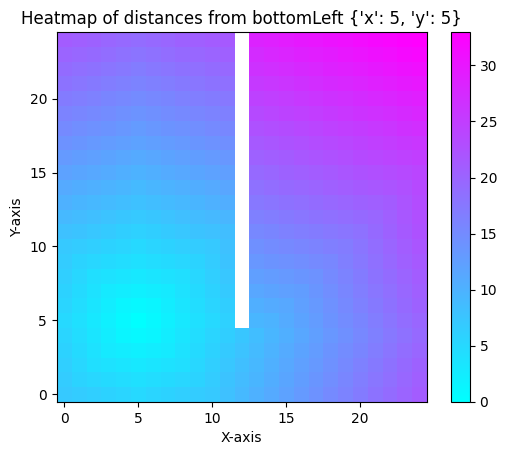

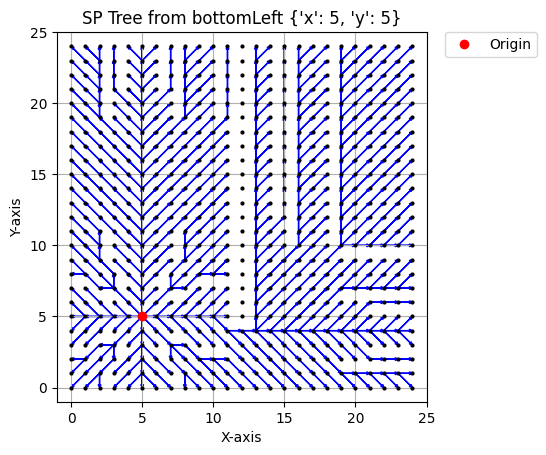

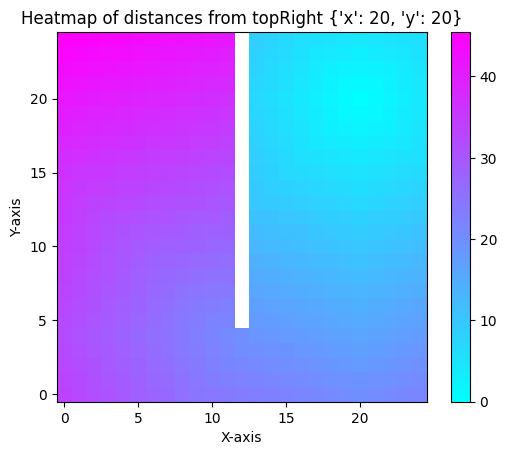

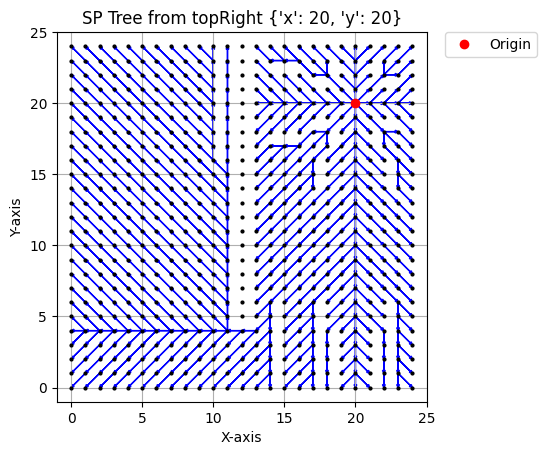

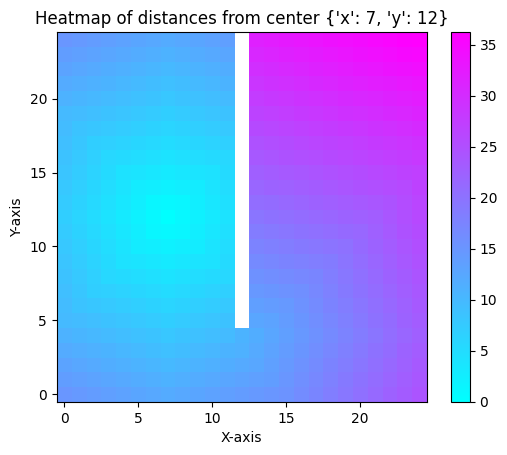

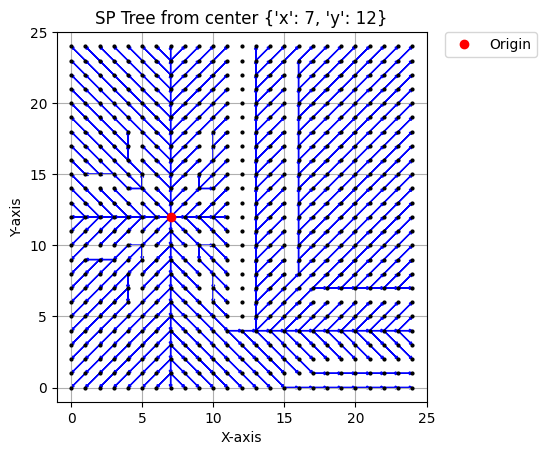

In [4]:
for case_name, case_origin in test_cases:
    make_heatmap(gridgraph, f"Heatmap of distances from {case_name} {case_origin}", case_origin)
    make_sp_tree(gridgraph, f"SP Tree from {case_name} {case_origin}", case_origin)